[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


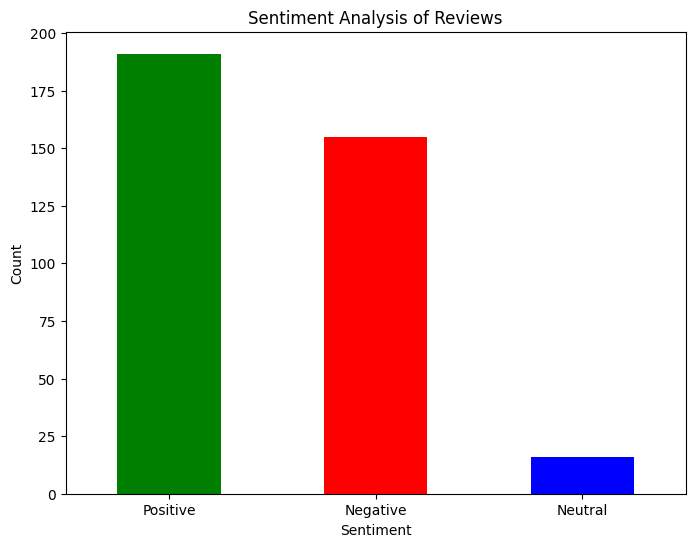

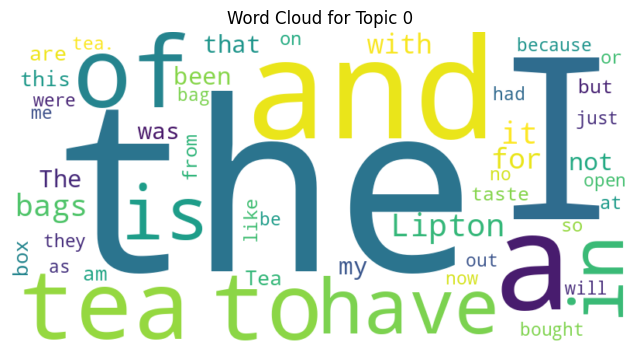

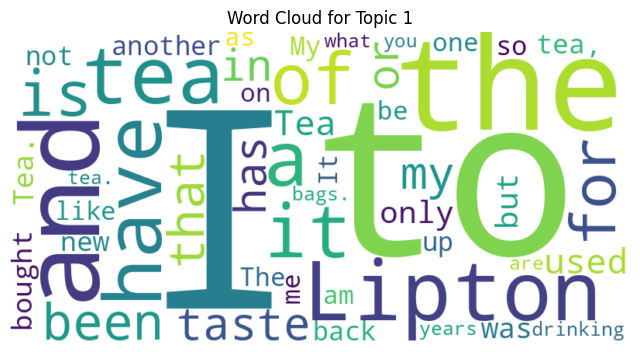

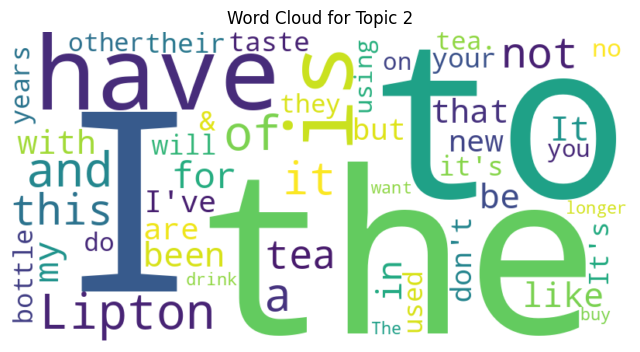

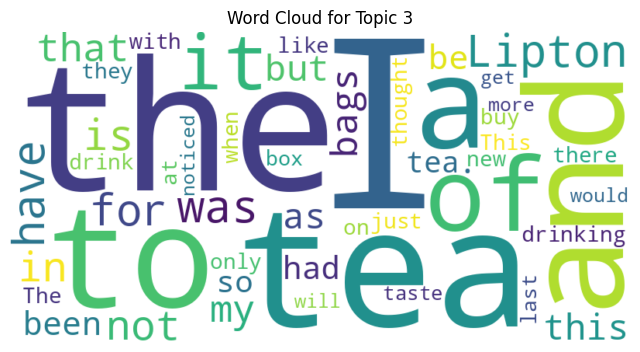

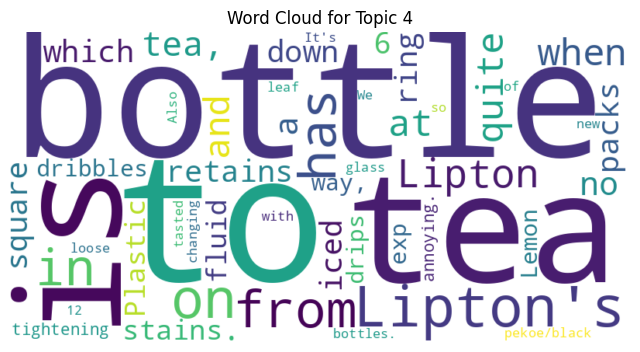

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk
from gensim import corpora, models

# Downloading Vader lexicon
nltk.download('vader_lexicon')

# Assuming you already have the DataFrame df with the 'Detailed Review' column
df = pd.read_csv('/content/lipton_final.csv')
# Perform sentiment analysis on each review
sid = SentimentIntensityAnalyzer()
df['Sentiment'] = df['detailed review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Map sentiment scores to labels
df['Sentiment Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Group by sentiment labels and count the occurrences
sentiment_counts = df['Sentiment Label'].value_counts()

# Plot the bar plot for overall sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Extract negative reviews
negative_reviews = df[df['Sentiment Label'] == 'Negative']['detailed review']

# Process the negative reviews
processed_docs = [review.split() for review in negative_reviews]

# Create dictionary and document-term matrix
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Build LDA model
num_topics = 5  # You can adjust this value based on your dataset
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Generate word clouds for each topic
for i in range(num_topics):
    plt.figure(figsize=(8, 6))
    topic_words = lda_model.show_topic(i, topn=50)  # Get the top 50 words for the topic
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(topic_words))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Word Cloud for Topic {}'.format(i))
    plt.axis('off')
    plt.show()
